<a href="https://colab.research.google.com/github/Vineela-Kandru/ML_Homework_Projects/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt

In [229]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

df = pd.read_csv(url)

In [230]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


For the rest of the homework, you'll need to use only these columns:

Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg
MSRP

In [231]:
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]

In [232]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


**Data preparation**

* Keep only the columns above

* Lowercase the column names and replace spaces with underscores

* Fill the missing values with 0

* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

* Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [233]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [234]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [235]:
df = df.fillna(0)

In [236]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [237]:
df.shape

(11914, 10)

In [238]:
#Renaming MSRP variable to price.

df.rename(columns = {'msrp':'price'}, inplace = True)

In [239]:
#making price binary

df_class = df.copy()

mean = df_class['price'].mean()

df_class['above_average'] = np.where(df_class['price']>=mean,1,0)

In [240]:
df_class.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [241]:
# Deleting target variable from the data frame

df_class = df_class.drop('price', axis=1)

In [242]:
from sklearn.model_selection import train_test_split

#Splitting the data 60/20/20

#full_train
df_full_train, df_test = train_test_split(df_class, test_size = 0.2, random_state = 1)

#Train and Validation sets
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state =1)

In [243]:
df_train = df_train.reset_index(drop = True)
df_val = df_train.reset_index(drop = True)
df_test = df_train.reset_index(drop = True)

In [244]:
# Target Variable - above_average

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [245]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [246]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17


**Question 1: ROC AUC feature importance**

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the above_average variable

Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

**Which numerical variable (among the following 4) has the highest AUC?**

***ANSWER - engine_hp - 0.917***

In [247]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [248]:
from sklearn.metrics import roc_auc_score

for column in numerical:
    auc = roc_auc_score(y_train, df_train[column])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[column])
    print(column, '-' , auc.round(3))

year - 0.688
engine_hp - 0.917
engine_cylinders - 0.766
highway_mpg - 0.633
city_mpg - 0.673


**Question 2: Training the model**

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

**What's the AUC of this model on the validation dataset? (round to 3 digits)**

***ANSWER - 0.986***

In [249]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

columns = categorical + numerical

train_dicts = df_train[columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [250]:
roc_auc_score(y_val, y_pred).round(3)

0.986

**Question 3: Precision and Recall**

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

For each threshold, compute precision and recall

Plot them

**At which threshold precision and recall curves intersect?**

***ANSWER: Threshold - 0.45	; Precision - 0.904	; Recall - 0.907***

In [251]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.arange(0.0, 1.0, 0.01)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'TP', 'FP', 'FN', 'TN']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores



In [252]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

df_scores


,threshold,TP,FP,FN,TN
0,0.00,1953,5195,0,0
1,0.01,1948,2216,5,2979
2,0.02,1947,1804,6,3391
3,0.03,1946,1570,7,3625
4,0.04,1946,1364,7,3831
...,...,...,...,...,...
95,0.95,888,0,1065,5195
96,0.96,807,0,1146,5195
97,0.97,760,0,1193,5195
98,0.98,686,0,1267,5195


In [253]:
df_scores['precision'] = (df_scores.TP / (df_scores.TP + df_scores.FP)).round(3)
df_scores['recall'] = (df_scores.TP / (df_scores.TP + df_scores.FN)).round(3)

In [254]:
df_scores

,threshold,TP,FP,FN,TN,precision,recall
0,0.00,1953,5195,0,0,0.273,1.000
1,0.01,1948,2216,5,2979,0.468,0.997
2,0.02,1947,1804,6,3391,0.519,0.997
3,0.03,1946,1570,7,3625,0.553,0.996
4,0.04,1946,1364,7,3831,0.588,0.996
...,...,...,...,...,...,...,...
95,0.95,888,0,1065,5195,1.000,0.455
96,0.96,807,0,1146,5195,1.000,0.413
97,0.97,760,0,1193,5195,1.000,0.389
98,0.98,686,0,1267,5195,1.000,0.351


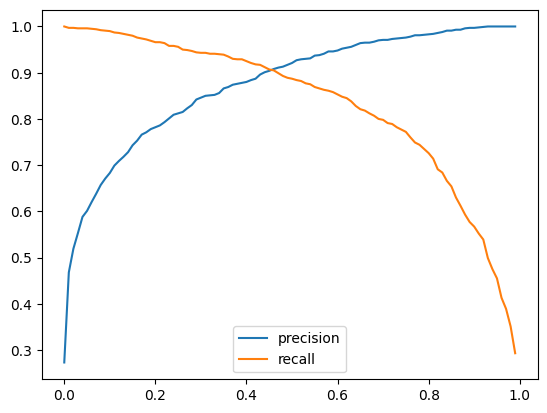

In [255]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')

plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.legend()

plt.show()

**Question 4: F1 score**

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both


Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

**At which threshold F1 is maximal?**

***ANSWER: 0.46***

In [256]:
df_scores['f1_score'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)

In [257]:
df_scores.f1_score.max()

0.9064975179260893

In [258]:
max_f1 = df_scores[df_scores['f1_score'] == df_scores['f1_score'].max()]

In [259]:
max_f1

,threshold,TP,FP,FN,TN,precision,recall,f1_score
46,0.46,1767,180,186,5015,0.908,0.905,0.906498


**Question 5: K-Fold CV**

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

Iterate over different folds of df_full_train

Split the data into train and validation

Train the model on train with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

Use AUC to evaluate the model on validation

**How large is standard devidation of the scores across different folds?**

***ANSWER - 0.002***

In [260]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [261]:
from sklearn.model_selection import KFold

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print(np.mean(scores).round(3),'-', np.std(scores).round(3))


0.979 - 0.002


**Question 6: Hyperparemeter Tuning**

Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 0.5, 10]

Initialize KFold with the same parameters as previously

Use these parametes for the model:

LogisticRegression(solver='liblinear', C=C, max_iter=1000)

Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

**Which C leads to the best mean score?**

***ANSWER - C= 10 mean =  0.981 std =  0.003***

In [262]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=' , C , 'mean = ',np.mean(scores).round(3), 'std = ', np.std(scores).round(3))

C= 0.01 mean =  0.952 std =  0.003
C= 0.1 mean =  0.972 std =  0.002
C= 0.5 mean =  0.977 std =  0.002
C= 10 mean =  0.981 std =  0.003
